In [ ]:
import pandas as pd
import numpy as np

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/HEROdata2.csv')

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Number of ports  Number of nets  Number of cells  \
0            26623          198177           172368   
1            27289          198776           172486   
2            27545          198893           172468   
3            28033          198562           172369   
4            27325          199431           172899   

   Number of combinational cells  Number of sequential cells  \
0                         164960                        6850   
1                         164991                        6934   
2                         164973                        6934   
3                         164960                        6850   
4                         165330                        7007   

   Number of macros/black boxes  Number of buf/inv  Number of references  \
0                             0              19504                    22   
1  

In [ ]:

null_columns = df.columns[df.isnull().all()]

df = df.drop(columns=null_columns)

In [ ]:
df = df.iloc[:, :-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

In [ ]:
df.head()

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Sequential Total Power,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label
0,26623,198177,172368,164960,6850,0,19504,22,173046.832,10376.1281,...,0.0000,18253.0,32696.0,5135800.0,56082.0,45560.0,38947.0,5677500.0,90182.0,0
1,27289,198776,172486,164991,6934,0,19504,2,173081.678,10376.1281,...,0.0000,18260.0,32707.0,5136600.0,56101.0,45820.0,38963.0,5685000.0,90465.0,1
2,27545,198893,172468,164973,6934,0,19504,2,173066.250,10376.1281,...,0.0000,18257.0,32707.0,5136200.0,56097.0,45851.0,38965.0,5685000.0,90498.0,1
3,28033,198562,172369,164960,6850,0,19504,1,173046.832,10376.1281,...,0.0000,18250.0,32693.0,5135800.0,56076.0,45553.0,38942.0,5677500.0,90170.0,1
4,27325,199431,172899,165330,7007,0,19518,3,173451.418,10385.7041,...,56.6048,18286.0,32727.0,5144100.0,56154.0,45725.0,38982.0,5701100.0,90405.0,1


In [ ]:
corr_matrix = df.corr().abs()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
df = df.drop(df[to_drop], axis=1)

In [ ]:
df.head()

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Internal Power,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label
0,26623,198177,6850,0,22,0,45.5597,38.9455,5.6775,0,...,0,0,0,0,0,0.0,0,0.0000,0.0,0
1,27289,198776,6934,0,2,0,45.8198,38.9611,5.6850,0,...,0,0,0,0,0,0.0,0,0.0000,0.0,1
2,27545,198893,6934,0,2,0,45.8511,38.9633,5.6850,0,...,0,0,0,0,0,0.0,0,0.0000,0.0,1
3,28033,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0,0.0,0,0.0000,0.0,1
4,27325,199431,7007,0,3,0,45.7246,38.9802,5.7011,0,...,0,0,0,0,0,0.0,0,39.8946,13018.0,1


In [ ]:
X = df.drop(columns=["Label"])
Y = df["Label"]

In [ ]:
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 27


In [ ]:
# prompt: count in labels column no of 0 and 1

print(df['Label'].value_counts())


Label
1    886
0     21
Name: count, dtype: int64


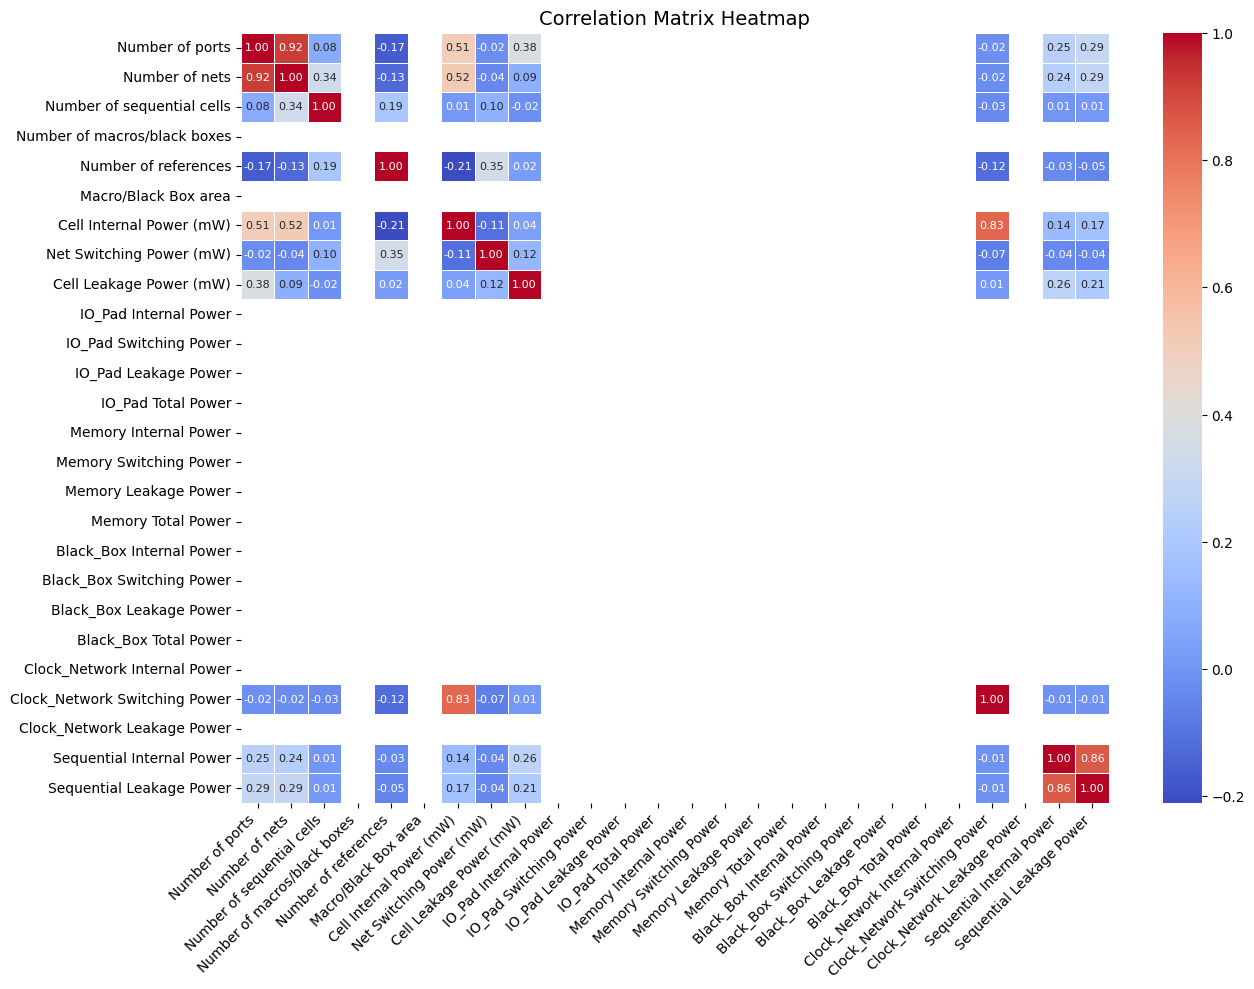

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove constant columns
df_filtered = df.loc[:, df.nunique() > 1]

# Compute correlation matrix
corr_matrix = df.drop(columns=["Label"]).corr()

# Create an upper triangle mask


# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


In [ ]:

df.columns


Index(['Number of ports', 'Number of nets', 'Number of sequential cells',
       'Number of macros/black boxes', 'Number of references',
       'Macro/Black Box area', 'Cell Internal Power (mW)',
       'Net Switching Power (mW)', 'Cell Leakage Power (mW)',
       'IO_Pad Internal Power', 'IO_Pad Switching Power',
       'IO_Pad Leakage Power', 'IO_Pad Total Power', 'Memory Internal Power',
       'Memory Switching Power', 'Memory Leakage Power', 'Memory Total Power',
       'Black_Box Internal Power', 'Black_Box Switching Power',
       'Black_Box Leakage Power', 'Black_Box Total Power',
       'Clock_Network Internal Power', 'Clock_Network Switching Power',
       'Clock_Network Leakage Power', 'Sequential Internal Power',
       'Sequential Leakage Power', 'Label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.74115254, 0.99057161, 0.06675946, ..., 0.        , 0.        ,
        0.        ],
       [0.75971131, 0.99356768, 0.0675828 , ..., 0.        , 0.        ,
        0.        ],
       [0.76684501, 0.9941529 , 0.0675828 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00927938, 0.04121484, 0.06689668, ..., 0.        , 0.        ,
        0.        ],
       [0.00927938, 0.04123484, 0.06693589, ..., 0.        , 0.        ,
        0.        ],
       [0.00927938, 0.04118983, 0.06684767, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, stratify=Y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:

model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=512 , activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=256 , activation='relu'))
model.add(tf.keras.layers.Dense(units=128 , activation='relu'))
model.add(tf.keras.layers.Dense(units=64 , activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


TabNet

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())

NaNs in X_train: 0
NaNs in X_test: 1


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
print("NaNs in X_train after cleaning:", np.isnan(X_train).sum())
print("NaNs in X_test after cleaning:", np.isnan(X_test).sum())


NaNs in X_train after cleaning: 0
NaNs in X_test after cleaning: 0


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Preserve original labels
y_train_flat = np.array(Y_train).flatten()
y_test_flat = np.array(Y_test).flatten()

# Compute class weights manually
classes = np.unique(y_train_flat)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=y_train_flat)
class_weights_dict = {int(cls): float(weight) for cls, weight in zip(classes, class_weights)}
print("Class weights:", class_weights_dict)

# Instantiate TabNetClassifier
clf = TabNetClassifier(
    n_d=64,
    n_a=64,
    n_steps=7,
    gamma=1.5,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    mask_type='sparsemax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    verbose=1
)

# Train the model
clf.fit(
    X_train=X_train,
    y_train=y_train_flat,
    eval_set=[(X_train, y_train_flat), (X_test, y_test_flat)],
    eval_name=['train', 'test'],
    eval_metric=['auc', 'balanced_accuracy', 'accuracy'],
    max_epochs=200,
    patience=50,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    weights=class_weights_dict,
    drop_last=False
)


Class weights: {0: 21.323529411764707, 1: 0.5120056497175142}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.80702 | train_auc: 0.5098  | train_balanced_accuracy: 0.49983 | train_accuracy: 0.30345 | test_auc: 0.46629 | test_balanced_accuracy: 0.5323  | test_accuracy: 0.32418 |  0:00:00s
epoch 1  | loss: 1.94335 | train_auc: 0.48629 | train_balanced_accuracy: 0.51915 | train_accuracy: 0.39724 | test_auc: 0.46208 | test_balanced_accuracy: 0.57725 | test_accuracy: 0.41209 |  0:00:01s
epoch 2  | loss: 1.62931 | train_auc: 0.59937 | train_balanced_accuracy: 0.55317 | train_accuracy: 0.96828 | test_auc: 0.73455 | test_balanced_accuracy: 0.49157 | test_accuracy: 0.96154 |  0:00:02s
epoch 3  | loss: 1.63935 | train_auc: 0.58973 | train_balanced_accuracy: 0.58259 | train_accuracy: 0.96966 | test_auc: 0.69242 | test_balanced_accuracy: 0.49157 | test_accuracy: 0.96154 |  0:00:03s
epoch 4  | loss: 1.80103 | train_auc: 0.57046 | train_balanced_accuracy: 0.556   | train_accuracy: 0.97379 | test_auc: 0.625   | test_balanced_accuracy: 0.49719 | test_accuracy: 0.97253 |  0:00:04s
epoch 5  |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


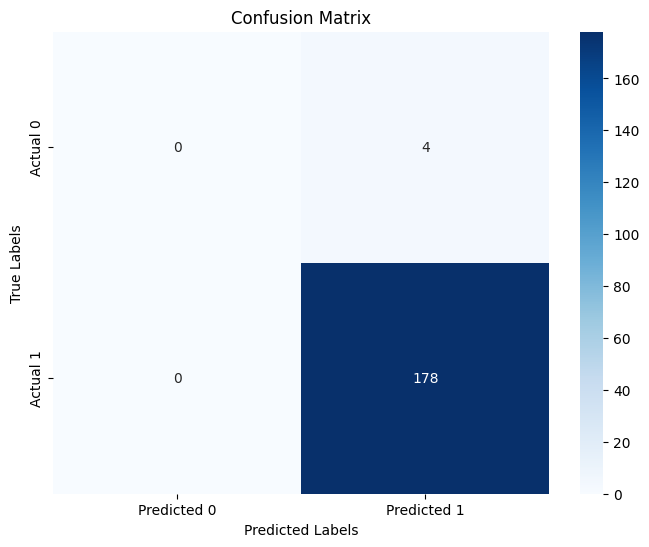

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (your existing code) ...

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: print accuracy sccore and classfication report for tab net

from sklearn.metrics import accuracy_score, classification_report

# ... (your existing code) ...

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
print(classification_report(Y_test, y_pred))


Accuracy: 0.978021978021978
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       178

    accuracy                           0.98       182
   macro avg       0.49      0.50      0.49       182
weighted avg       0.96      0.98      0.97       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tab Transformer

In [ ]:
import torch.nn as nn
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim_embedding=64, num_heads=4, num_layers=4):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(num_features, dim_embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_embedding, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(dim_embedding, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Adding a sequence length dimension
        x = self.transformer(x)
        x = torch.mean(x, dim=1)  # Pooling
        x = self.classifier(x)
        return x

In [ ]:
import torch.optim as optim
# Initialize the model, loss, and optimizer
# Assuming X_train is your training data
num_features = X_train.shape[1]  # Get the number of features from your data
num_classes = len(np.unique(Y_train))  # Get the number of unique classes in your target variable

# Initialize the model, loss, and optimizer
model = TabTransformer(num_features, num_classes).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Converting data to tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(Y_train)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.7866953611373901
Epoch 10, Loss: 0.11190719902515411
Epoch 20, Loss: 0.11164549738168716
Epoch 30, Loss: 0.11034441739320755
Epoch 40, Loss: 0.11124307662248611
Epoch 50, Loss: 0.1115354374051094
Epoch 60, Loss: 0.10964713990688324
Epoch 70, Loss: 0.10579086095094681
Epoch 80, Loss: 0.10588722676038742
Epoch 90, Loss: 0.10297729820013046


In [ ]:
# Switch the model to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    outputs = model(X_train_tensor)
    # For multi-class classification, get the class with the highest score
    _, predicted = torch.max(outputs, dim=1)

    # Calculate the number of correct predictions
    total = y_train_tensor.size(0)
    correct = (predicted == y_train_tensor).sum().item()

    # Compute accuracy
    accuracy = correct / total * 100  # in percentage
    print(f'Training Accuracy: {accuracy:.2f}%')


Training Accuracy: 97.79%


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# Convert your test data to PyTorch tensors
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(Y_test)  # FIXED

# Switch to evaluation mode
model.eval()

with torch.no_grad():
    # Get model outputs and compute loss on the test set
    outputs = model(X_test_tensor)
    loss = criterion(outputs, y_test_tensor)

    # Get predicted class
    _, predicted = torch.max(outputs, dim=1)

# Convert to numpy for sklearn
y_true = y_test_tensor.cpu().numpy()
y_pred = predicted.cpu().numpy()

# Metrics
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f"Test Loss: {loss.item():.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Test Loss: 0.1129
Test Accuracy: 97.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.99      0.99       178

    accuracy                           0.97       182
   macro avg       0.49      0.50      0.49       182
weighted avg       0.96      0.97      0.96       182



True Negatives: 0
False Positives: 4
False Negatives: 1
True Positives: 177
[np.int64(0), np.int64(4)]
[np.int64(1), np.int64(177)]


Text(0.5, 1.0, 'Confusion Matrix')

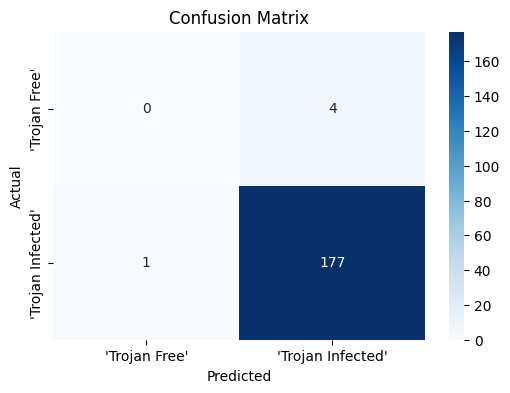

In [ ]:
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are already computed as numpy arrays
cm = confusion_matrix(y_true, y_pred)

# For binary classification, the confusion matrix is 2x2:
# [ [TN, FP],
#   [FN, TP] ]
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

print([tn, fp])
print([fn, tp])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


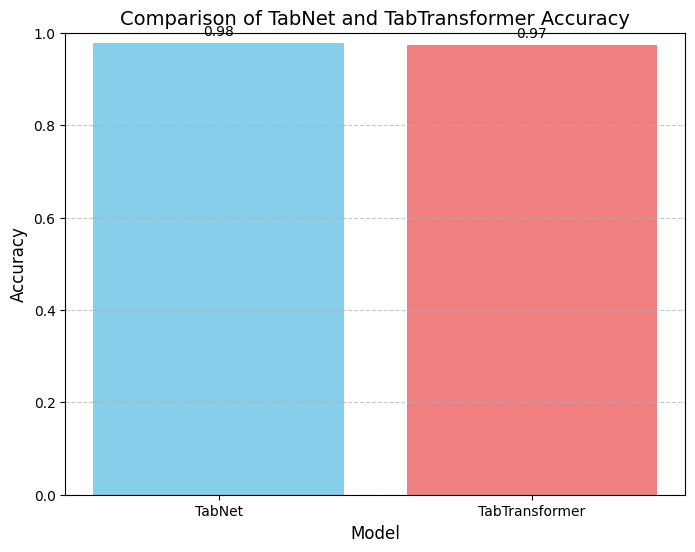

In [ ]:
# prompt: use some plot to show the diffence in accuracy of tabnet and tab tranformer

import matplotlib.pyplot as plt

# Assuming 'tabnet_accuracy' and 'tabtransformer_accuracy' are the accuracy scores you obtained
tabnet_accuracy = 0.9780  # Replace with your TabNet accuracy
tabtransformer_accuracy = 0.9725 # Replace with your TabTransformer accuracy


models = ['TabNet', 'TabTransformer']
accuracies = [tabnet_accuracy, tabtransformer_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of TabNet and TabTransformer Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()
